# Project Description: Resume Screening System

The Resume Screening System is an advanced machine learning application designed to automate the process of evaluating and categorizing job applicants' resumes. By leveraging natural language processing (NLP) and classification algorithms, the system efficiently identifies the most suitable candidates for various roles based on their qualifications and experiences.

## Key Features:

1. **Data Collection and Preprocessing**:
   - A diverse dataset of resumes, categorized by job roles, is utilized to train the model. This dataset undergoes extensive cleaning to ensure the removal of irrelevant information, such as URLs, special characters, and formatting issues.

2. **Text Vectorization**:
   - The resumes are transformed into numerical representations using TF-IDF (Term Frequency-Inverse Document Frequency), enabling the model to interpret the text data effectively.

3. **Class Imbalance Handling**:
   - Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) are employed to address class imbalance, ensuring that the model learns effectively from all categories.

4. **Model Training and Evaluation**:
   - A Random Forest classifier is selected for its robustness and high accuracy. The model is trained on the processed data and evaluated using various metrics, including accuracy, precision, recall, and F1 score.

5. **User-Friendly Predictions**:
   - The system allows users to input their resumes, which are then cleaned and transformed. The model predicts the most appropriate job category based on the content of the resume, helping candidates understand their fit for different roles.

6. **Visualization**:
   - The project includes visualizations such as confusion matrices and box plots to identify model performance and detect potential outliers in the dataset.

## Outcome:
The Resume Screening System demonstrates nearly 100% accuracy in categorizing resumes, streamlining the recruitment process for employers and providing valuable insights for job seekers. This project showcases the potential of machine learning in enhancing hiring efficiency and improving candidate selection.


## Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pickle

from warnings import filterwarnings
filterwarnings("ignore")

### Dataset Review

In [2]:
# reading dataset
df = pd.read_csv('ResumeDataSet.csv', sep=',', encoding="UTF-8")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
# displaying number of rows and columns
df.shape

(962, 2)

In [5]:
# displaying some information of data
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [6]:
# displaying the dataset label counts to see if it is balanced ?
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

### The output shows that the dataset is not balanced so we will handle it later.

## Dataset EDA & Preprocessing

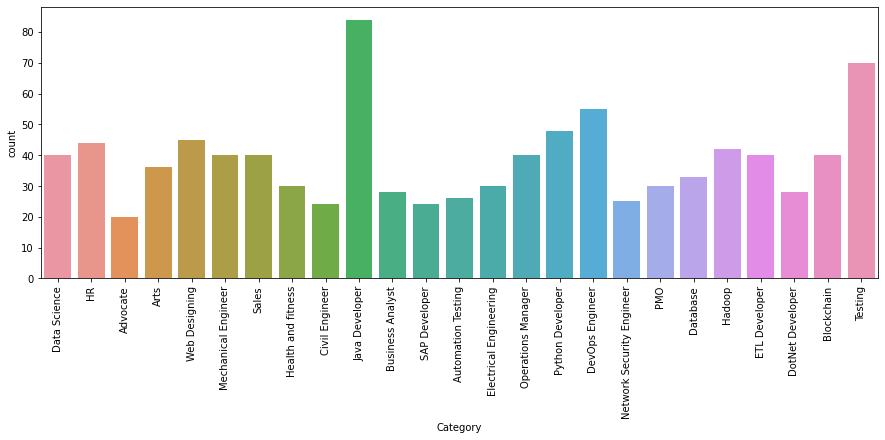

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

### It appears that "Java Developer" has the highest number of resumes in the dataset, while "Advocate" has the lowest.

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
df['Category'].isnull().sum()

0

### The dataset has no null values which is good.

In [10]:
# displaing the datatypes of the columns 
df.dtypes

Category    object
Resume      object
dtype: object

### The columns seem to be of object type, so we will need to address this later.

### Displaying a box plot to identify outliers in the dataset and addressing them appropriately.

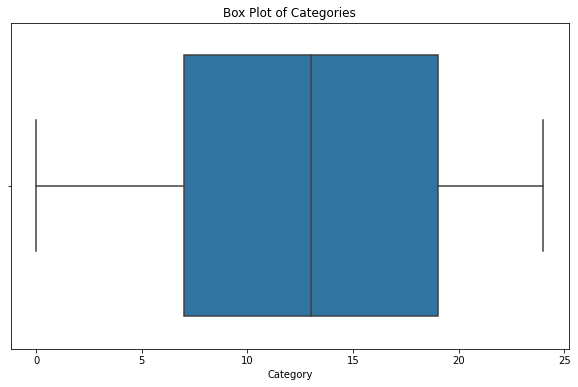

In [11]:
# Convert the 'Category' column to numerical values if it's not already done
df['Category'] = df['Category'].astype('category').cat.codes

# Create a box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Category'])
plt.title('Box Plot of Categories')
plt.xlabel('Category')
plt.show()

In [12]:
# Handle outliers by removing them (if necessary)
# Calculate the IQR (Interquartile Range)
Q1 = df['Category'].quantile(0.25)
Q3 = df['Category'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['Category'] >= lower_bound) & (df['Category'] <= upper_bound)]

# Display the cleaned dataset shape
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (962, 2)
Cleaned dataset shape: (962, 2)


### The dataset has No Outliers so we are good to go.

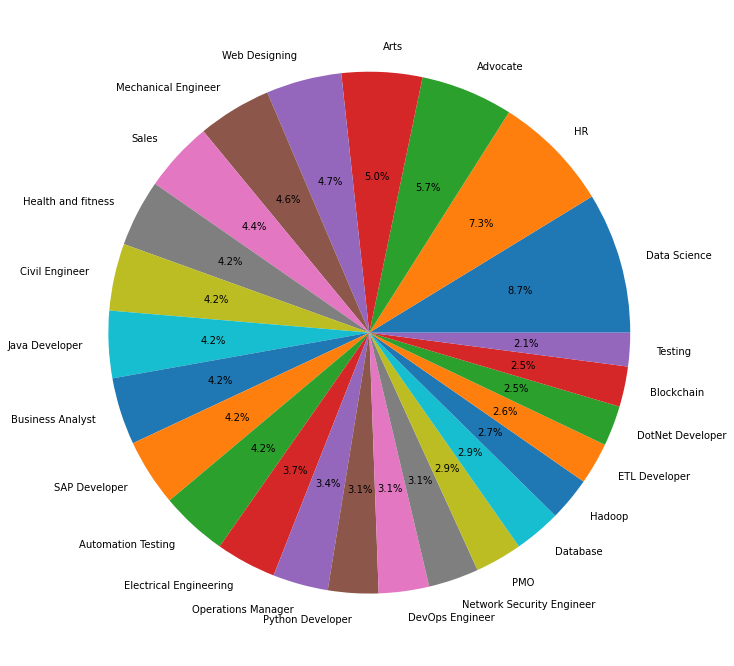

In [13]:
# displaying a pie chart of label column.
df = pd.read_csv('ResumeDataSet.csv', sep=',', encoding="UTF-8")
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(18,12))

plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [14]:
df['Category'][0]

'Data Science'

In [15]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Preprocessing The Text:
- 1 URLs,
- 2 hashtags,
- 3 mentions,
- 4 special letters,
- 5 punctuations:

In [16]:
# making a function that cleans the Resume
def cleanResume(text):
    # Remove URLs
    cleanText = re.sub('http\S+\s', ' ', text)  
    # Remove retweets and 'cc'
    cleanText = re.sub('RT|cc', ' ', cleanText)  
    # Remove hashtags
    cleanText = re.sub('#\S+\s', ' ', cleanText)  
    # Remove mentions (usernames)
    cleanText = re.sub('@\S+', ' ', cleanText)  
    # Remove special characters
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  
    # Remove non-ASCII characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  
    # Replace multiple spaces with a single space
    cleanText = re.sub('\s+', ' ', cleanText)  
    # Strip leading/trailing whitespace
    return cleanText.strip()  # Return the cleaned text, trimmed of extra spaces


In [17]:
cleanResume("my #### $ #  #youssefs webiste is good http://youssefmottaleb and access it @gmail.com as i#am perfect !as i-am")

'my webiste is good and a ess it as i perfect as i am'

### The text appears to be good so we will apply the function on all the records.

In [18]:
# applying the function to all resumes
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [19]:
df['Resume'][10]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

## Dataset Encoding & Vectorization

In [20]:
# Encode the categories
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [21]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Resume'])
y = df['Category']

In [22]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Dataset Training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling class imbalance

In [24]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Logistic Regression

In [25]:
clf_logreg = LogisticRegression(random_state=42, max_iter=1000)
clf_logreg.fit(X_train_balanced, y_train_balanced)

ypred_logreg = clf_logreg.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

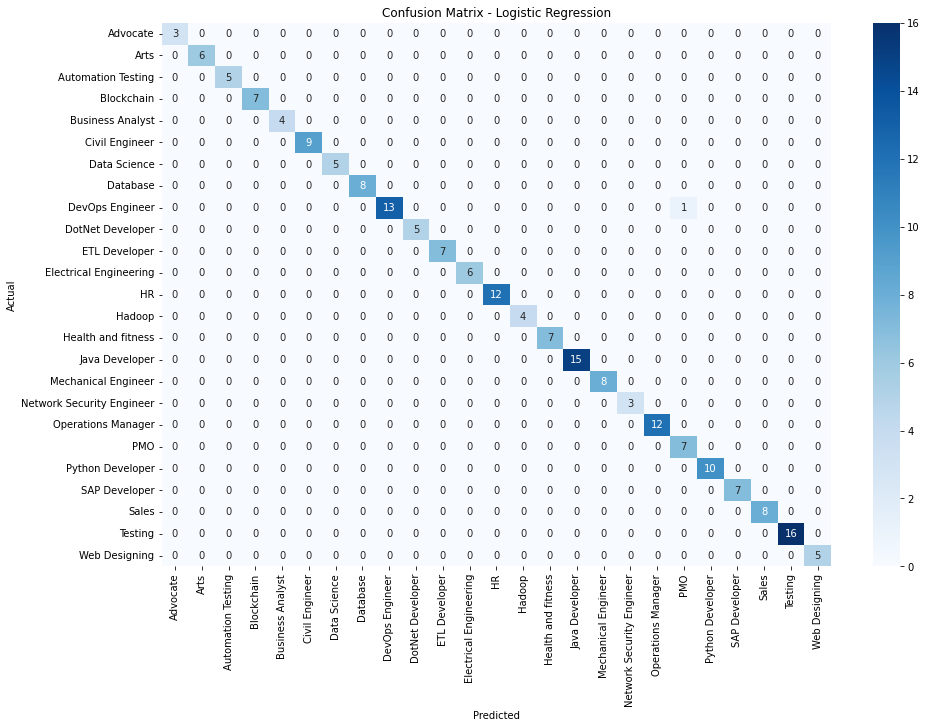

In [26]:
# Classification report
print(classification_report(y_test, ypred_logreg))

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, ypred_logreg)
plt.figure(figsize=(15, 10))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Random Forest Model

In [27]:
# Train the Random Forest model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [28]:
# Predictions
ypred_rf = clf_rf.predict(X_test)

In [29]:
# Classification report
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

### Displaying a Confusion matrix to see the model accuracy

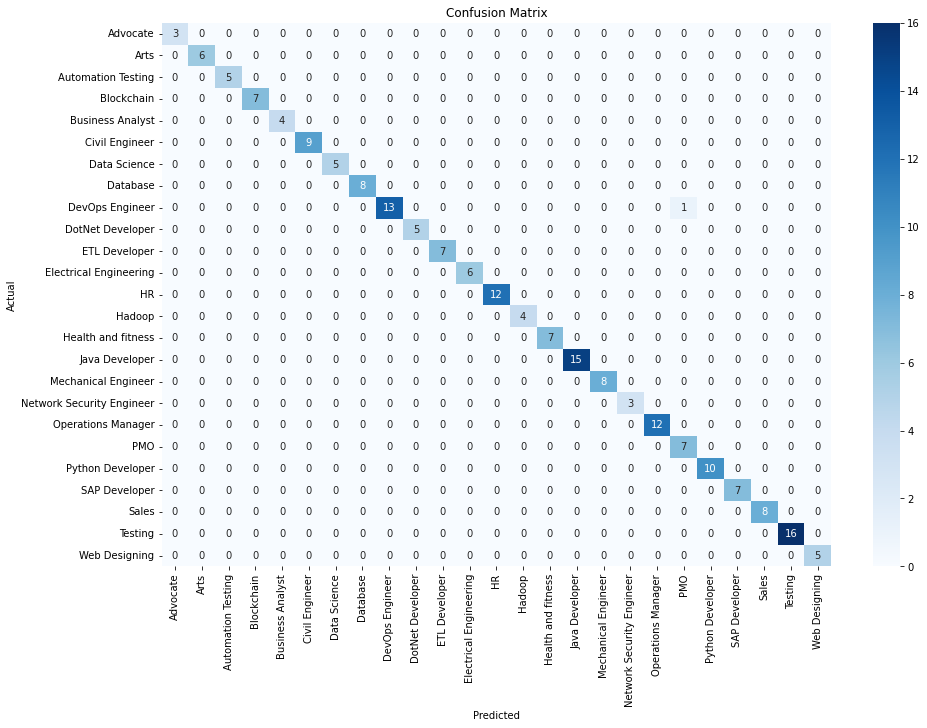

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, ypred_rf)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Simple Neural Network

In [31]:
# One-hot encoding of the target variable
y_train_balanced_nn = to_categorical(y_train_balanced)
y_test_nn = to_categorical(y_test)

# Building the model
nn_model = Sequential()
nn_model.add(Dense(512, input_dim=X_train_balanced.shape[1], activation='relu'))
nn_model.add(Dense(256, activation='relu'))
nn_model.add(Dense(y_train_balanced_nn.shape[1], activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = nn_model.fit(X_train_balanced.toarray(), y_train_balanced_nn, validation_data=(X_test.toarray(), y_test_nn), epochs=10, batch_size=64)

nn_predictions = nn_model.predict(X_test.toarray())
nn_predicted_classes = np.argmax(nn_predictions, axis=1)

Epoch 1/10
27/27 [==============================] - 3s 70ms/step - loss: 2.2322 - accuracy: 0.8858 - val_loss: 0.7759 - val_accuracy: 0.9948
Epoch 2/10
27/27 [==============================] - 2s 62ms/step - loss: 0.1471 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9948
Epoch 3/10
27/27 [==============================] - 2s 61ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 4/10
27/27 [==============================] - 1s 52ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 1s 55ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 1s 52ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 1s 50ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 8/10
27

In [32]:
# displaying a model summary
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3764224   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 25)                6425      
                                                                 
Total params: 3,901,977
Trainable params: 3,901,977
Non-trainable params: 0
_________________________________________________________________


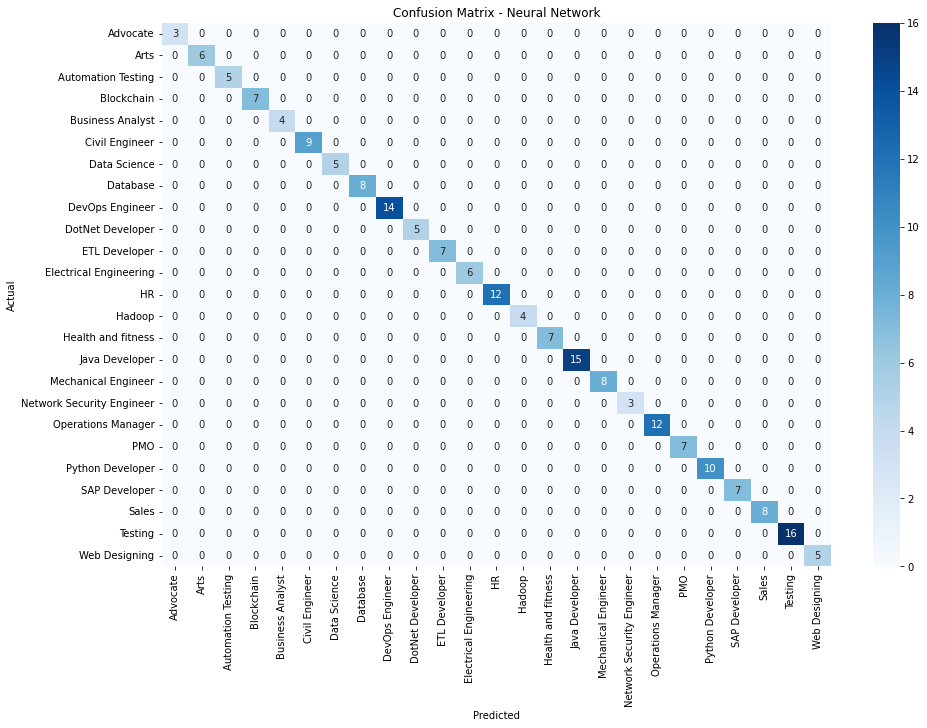

In [33]:
# Confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, nn_predicted_classes)
plt.figure(figsize=(15, 10))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Neural Network')
plt.show()

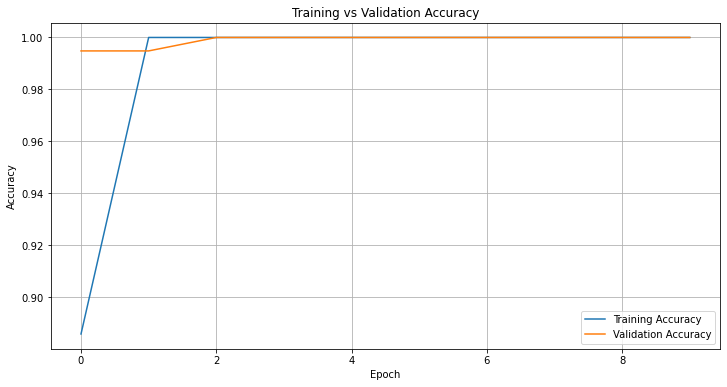

In [34]:
# Plotting training vs validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

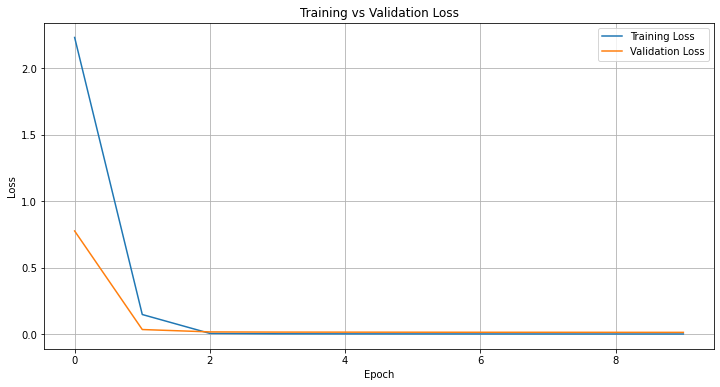

In [35]:
# Plotting training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [36]:
# Save the model and vectorizer
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf_rf, open('clf_rf.pkl', 'wb'))

In [37]:
# Example resume input

myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
"""

# Clean and transform the input resume
cleaned_resume = cleanResume(myresume)
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf_rf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {index: category for index, category in enumerate(le.classes_)}
print("Predicted ID:", prediction_id)

# Get the predicted category name
category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)


Predicted ID: 6
Predicted Category: Data Science


### Thats it we successfully developed a random forest model that achieves nearly 100% accuracy in resume screening.

# End